In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import TensorFlow
import tensorflow as tf

# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# Importing the CIFAR-10 dataset from Keras 
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print(f"X Train Size: {len(X_train)}\n X Test Size: {len(X_test)}" )

X Train Size: 50000
 X Test Size: 10000


In [ ]:
# Print a sample from X_test dataset
print(X_test[42]) #Pixel Values

[[[149 149 150]
  [149 149 146]
  [140 140 139]
  ...
  [175 147 171]
  [165 149 164]
  [167 160 173]]

 [[147 147 147]
  [150 150 147]
  [140 140 140]
  ...
  [192 150 176]
  [183 146 166]
  [163 149 158]]

 [[149 149 149]
  [154 154 151]
  [142 142 142]
  ...
  [193 138 162]
  [200 149 170]
  [193 168 178]]

 ...

 [[117 125 136]
  [ 87  91 108]
  [ 65  61  74]
  ...
  [ 50  21  33]
  [ 19  16  19]
  [ 16  19  21]]

 [[125 136 144]
  [110 116 133]
  [ 69  67  83]
  ...
  [ 58  24  38]
  [ 18  16  19]
  [ 16  19  20]]

 [[152 166 172]
  [120 128 145]
  [ 69  69  87]
  ...
  [ 68  37  50]
  [ 15  16  18]
  [ 15  19  20]]]


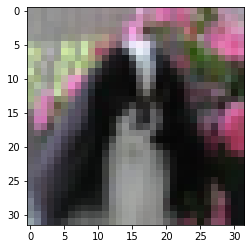

(32, 32, 3)

In [ ]:
# Use the .imshow() function and show the plot
plt.imshow(X_test[42])
plt.show()
# Print the shape of the sample image
X_test[42].shape # RGB images have 3 channels 

In [ ]:
# Create the validation datasets 
# and assign the last 10000 images of X_train and y_train
X_val = X_train[40000:]
y_val = y_train[40000:]
# Create new train datasets
# and assign the first 40000 images of X_train and y_train
X_train = X_train[:40000]
y_train = y_train[:40000]

In [ ]:
# Print the lengths of the each dataset
print("X Train Length:", len(X_train))
print("X Test Length:", len(X_test))
print("X Val Length:", len(X_val))
print("Y Train Length:", len(y_train))
print("Y Test Length:", len(y_test))
print("Y Val Length:", len(y_val))

X Train Length: 40000
X Test Length: 10000
X Val Length: 10000
Y Train Length: 40000
Y Test Length: 10000
Y Val Length: 10000


In [ ]:
# Divide each dataset by 255
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [ ]:
 #Create a model object
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add( tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add( tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add( tf.keras.layers.Dropout(0.35))

In [ ]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1028, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add( tf.keras.layers.Dropout(0.5))

In [ ]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Train the model for 50 epochs 
results = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
1237/1250 [============================>.] - ETA: 17s - loss: 1.3682 - accuracy: 0.5237

In [ ]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("epochs")
plt.ylabel("Loss")
# Put legend table
plt.legend()
plt.grid()
# Show the plot
plt.show()

In [ ]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("epochs")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()
plt.grid()
# Show the plot
plt.show()

In [ ]:
# Evaluate the performance
model.evaluate(X_test, y_test)

In [ ]:
# Make prediction on the reshaped sample
predict_result = model.predict(X_test[42].reshape(1,32,32,3))
# Print the prediction result
print(predict_result)
# Find the predicted class
predict_class = predict_result.argmax()
# Find the prediction probability
predict_prob = predict_result.max()

In [ ]:
# Print the results
print(f"Image belongs to class: {predict_class}\n Prob is: {predict_prob}")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

y_preds = model.predict(X_test)
y_pred=y_preds.argmax(axis=1)
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=class_names,
       columns=class_names)
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True,cmap='BuPu')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
